Experimenting with depth of weak learner (max_depth)

In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import warnings

In [2]:
df = pd.read_csv('../data/spambase_augmented.csv')

In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('df shape : ' , df.shape)
print('X shape : ' , X.shape)
print('y shape : ', y.shape)

df shape :  (4600, 1186)
X shape :  (4600, 1185)
y shape :  (4600,)


max_depth in [1, 2, 3, 5, 10]

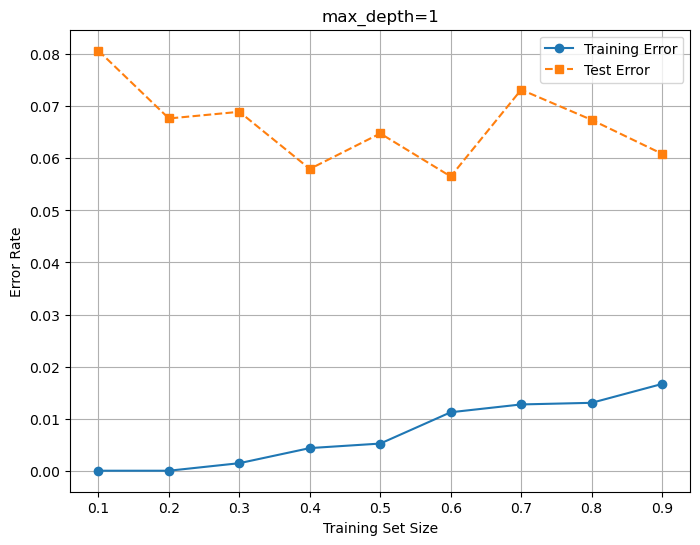

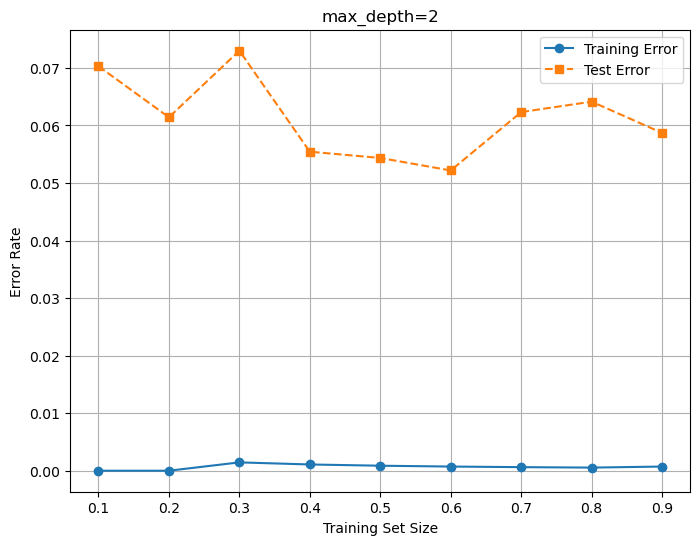

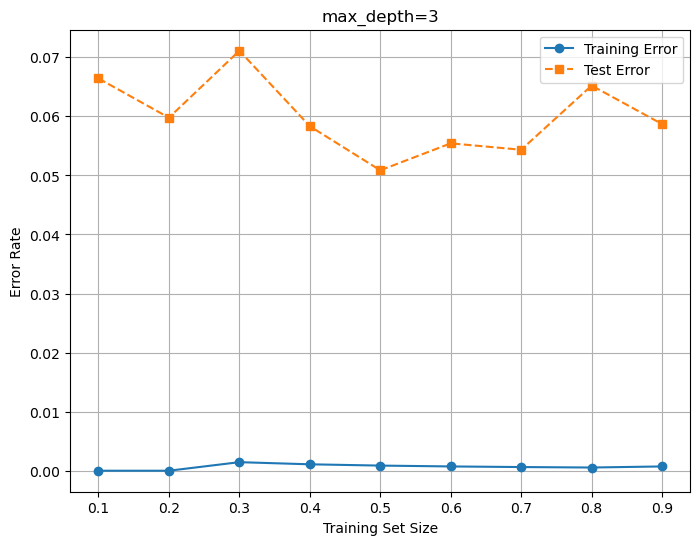

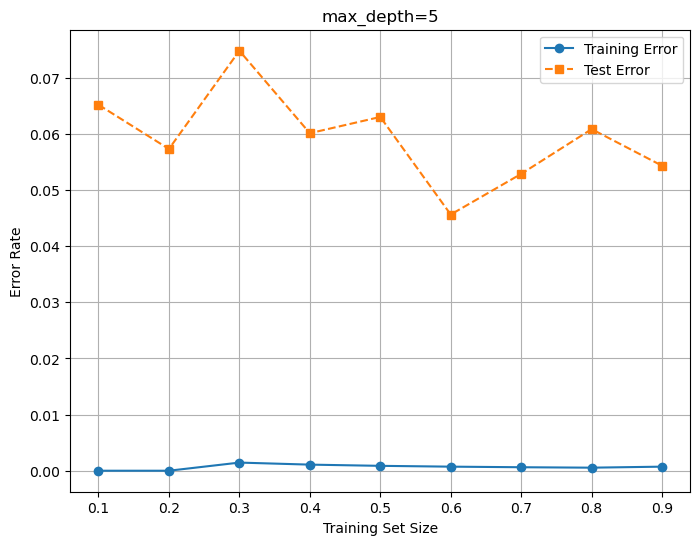

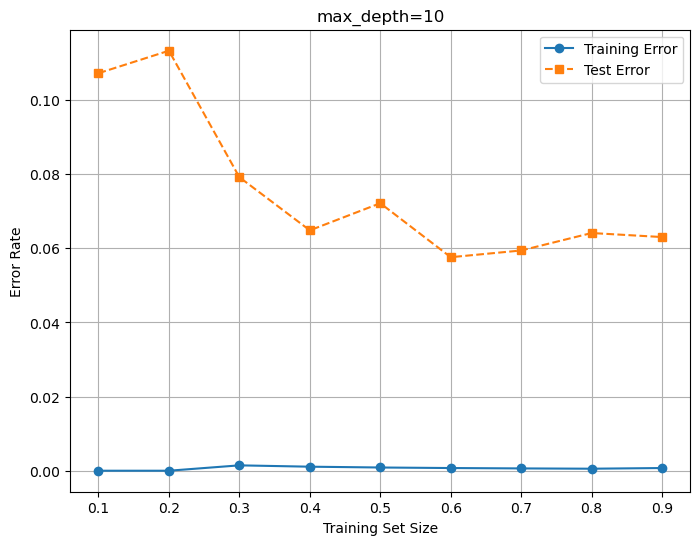

In [4]:
warnings.filterwarnings("ignore")
max_depth_values = [1, 2, 3, 5, 10]  
train_sizes = np.linspace(0.1, 0.9, 9)  

# Store results
results = {}

for depth in max_depth_values:
    train_error = []
    test_error = []

    for train_size in train_sizes:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

        # Create AdaBoost with decision trees of specific depth
        base_learner = DecisionTreeClassifier(max_depth=depth)
        model = AdaBoostClassifier(estimator=base_learner, n_estimators=200)
        model.fit(X_train, y_train)

        # Compute training error
        y_train_pred = model.predict(X_train)
        cur_training_err = 1 - accuracy_score(y_train, y_train_pred)

        # Compute test error
        y_test_pred = model.predict(X_test)
        cur_test_error = 1 - accuracy_score(y_test, y_test_pred)

        train_error.append(cur_training_err)
        test_error.append(cur_test_error)

    # Plot training vs. test error
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_error, label="Training Error", marker='o', linestyle='-')
    plt.plot(train_sizes, test_error, label="Test Error", marker='s', linestyle='--')
    plt.xlabel("Training Set Size")
    plt.ylabel("Error Rate")
    plt.title(f"max_depth={depth}")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Store results for later analysis
    results[depth] = [train_error, test_error]

In [6]:
for k,v in results.items():
    print(f"max_depth = {k} : ")
    print(f"training error : {v[0]}")
    print(f"test error : {v[1]}")
    print('----------------')

max_depth = 1 : 
training error : [0.0, 0.0, 0.0014492753623188692, 0.004347826086956497, 0.00521739130434784, 0.011231884057971042, 0.01273291925465836, 0.013043478260869601, 0.01666666666666672]
test error : [0.08067632850241546, 0.06766304347826091, 0.06894409937888202, 0.05797101449275366, 0.06478260869565222, 0.05652173913043479, 0.0731884057971014, 0.06739130434782614, 0.060869565217391286]
----------------
max_depth = 2 : 
training error : [0.0, 0.0, 0.0014492753623188692, 0.0010869565217391797, 0.0008695652173913437, 0.0007246376811593791, 0.0006211180124223725, 0.0005434782608695343, 0.0007246376811593791]
test error : [0.07028985507246377, 0.06141304347826082, 0.07298136645962738, 0.05543478260869561, 0.05434782608695654, 0.05217391304347829, 0.062318840579710155, 0.06413043478260871, 0.05869565217391304]
----------------
max_depth = 3 : 
training error : [0.0, 0.0, 0.0014492753623188692, 0.0010869565217391797, 0.0008695652173913437, 0.0007246376811593791, 0.00062111801242237